This notebook references lectures 1-4 from the Deep Learning course by Proffessor Bryce. 

This Notebook implements two simplistic neurons for: 
1. Regression task
2. Classification task

For both the tasks, f(x) = XW + b  (weighted sum of inputs with bias) is used as a primary function. \
\
For Regression, \
    Loss = Mean Squared Error \
\
For Classification, \
    Loss = Log Loss or Binary Cross Entropy Loss \
    (Reference for understanding the concept: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a/)

Optimization Technique used => Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
# Synthetic data for regression and classification

def synthetic_regression_data(N, # number of datapoints to generate
                              n_input, # number of input variables 
                              ): 
    
    # 1. determine weights and bias randomly for the data
    W = np.random.randn(n_input)
    b = np.random.randn()
    
    # 2. Generate data
    X = np.random.randint(10, size=(N, n_input))
    y = X.dot(W) + b + np.random.rand(N)
    
    
    # 4. return the W, b and data
    return X, y
    
    
def synthetic_classification_data(N, n_input):
    
    # 1. determine weights and bias randomly for the data
    W = np.random.randn(n_input)
    b = np.random.randn()
    
    # 2. Generate data
    X = np.random.randint(10, size=(N, n_input))
    y_ = X.dot(W) + b + np.random.rand()
    threshold = np.random.random()
    y = (y_ >= threshold).astype(int)
    
    
    # 4. return the W, b and data
    return threshold, X, y
    

In [3]:
X_reg, y_reg = synthetic_regression_data(100, 5)

cls_threshold, X_cls, y_cls = synthetic_classification_data(100, 5)

### Single Neuron Regression Implementation

In [4]:
class RegressionNeuron():
    
    def __init__(self):
        pass
        
    def predict(self, X):
        return X.dot(self.W) + self.b


    def fit(self, X, y, alpha = 0.01, epochs = 100):
        
        m, n = X.shape
        
        self.W = np.random.randn(n)
        self.b = np.random.randn()
        self.alpha = alpha
        
        for epoch in range(epochs):
            # 1. Compute Weighted Sum
            z = self.predict(X)
            
            error = y - z

            w_grad = (-2/m) * X.T.dot(error)
            b_grad = (-2/m) * np.sum(error)

            self.W -= (self.alpha * w_grad)
            self.b -= (self.alpha * b_grad)

            #print(f"Epoch {epoch+1} => ", np.mean(error ** 2))


In [5]:
rn = RegressionNeuron()
rn.fit(X_reg, y_reg, 0.001, 225)
y_pred = rn.predict(X_reg)

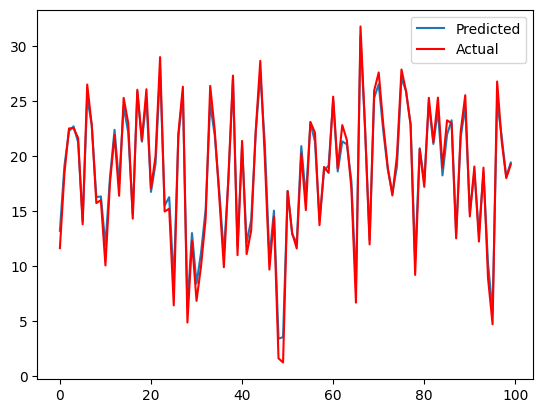

In [6]:
plt.plot(y_pred)
plt.plot(y_reg, color = "red")
plt.legend(['Predicted', 'Actual'])

### Classification Single Neuron

In [7]:
class ClassificationNeuron():
    
    def __init__(self):
        pass
        
    def sigmoid_(self, X):
        z = X.dot(self.W) + self.b
        return 1/ (1 + np.exp(-z)) 
        
    def predict(self, X, threshold = 0.5):
        y = self.sigmoid_(X)
        y = (y >= threshold).astype(int)
        return y
        


    def fit(self, X, y, alpha = 0.01, epochs = 100):
        
        m, n = X.shape
        
        self.W = np.random.randn(n)
        self.b = np.random.randn()
        self.alpha = alpha
        
        for epoch in range(epochs):
            # 1. Compute Weighted Sum
            z = self.sigmoid_(X)
            
            error = z - y

            w_grad = (1/m) * X.T.dot(error)
            b_grad = (1/m) * np.sum(error)

            self.W -= (self.alpha * w_grad)
            self.b -= (self.alpha * b_grad)

            print(f"Epoch {epoch+1} => ", np.mean(error ** 2))


In [8]:
cn = ClassificationNeuron()
cn.fit(X_cls, y_cls, 0.001, 106)
y_pred_cls = cn.predict(X_cls)

Epoch 1 =>  0.6400301523359659
Epoch 2 =>  0.6400765041493851
Epoch 3 =>  0.6401178763366356
Epoch 4 =>  0.6401537752287593
Epoch 5 =>  0.6401836918797815
Epoch 6 =>  0.6402071048588311
Epoch 7 =>  0.6402234831060752
Epoch 8 =>  0.6402322888036289
Epoch 9 =>  0.6402329802153257
Epoch 10 =>  0.640225014452838
Epoch 11 =>  0.640207850129979
Epoch 12 =>  0.6401809498719063
Epoch 13 =>  0.6401437826512049
Epoch 14 =>  0.6400958259282996
Epoch 15 =>  0.6400365675791514
Epoch 16 =>  0.6399655075985947
Epoch 17 =>  0.6398821595728589
Epoch 18 =>  0.6397860519196638
Epoch 19 =>  0.6396767288987274
Epoch 20 =>  0.6395537513995194
Epoch 21 =>  0.6394166975165789
Epoch 22 =>  0.6392651629257291
Epoch 23 =>  0.6390987610769973
Epoch 24 =>  0.6389171232220731
Epoch 25 =>  0.6387198982956749
Epoch 26 =>  0.6385067526713056
Epoch 27 =>  0.6382773698125752
Epoch 28 =>  0.6380314498415784
Epoch 29 =>  0.6377687090457606
Epoch 30 =>  0.6374888793443052
Epoch 31 =>  0.6371917077343388
Epoch 32 =>  0.6368

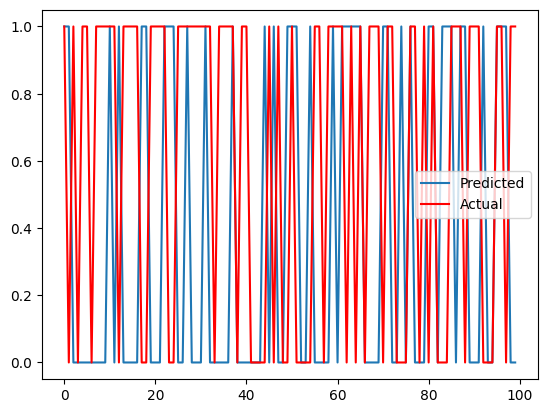

In [9]:
plt.plot(y_pred_cls)
plt.plot(y_cls, color = "red")
plt.legend(['Predicted', 'Actual'])